# Introduction

The goal of this project is to practice cleaning a dataset. Data cleaning is a critical step in data science, ensuring that raw data is properly prepared for deeper analysis. In this project, we'll focus on identifying and correcting errors, handling missing values, and standardizing the data to ensure its quality and consistency. The dataset used in this project was sourced from Kaggle, providing a real-world example to apply these essential data cleaning techniques.


In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Dataset/Wine_Quality.csv')

In [11]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe()

,Rank,Shows
count,20.000000,20.000000
mean,10.450000,110.000000
std,5.942488,66.507617
min,1.000000,41.000000
25%,5.750000,59.000000
50%,10.500000,87.000000
75%,15.250000,134.500000
max,20.000000,325.000000


In [13]:
df.shape

(6497, 13)

## 1. Dealing with Missing Data 

The first step in this project is to focus on handling missing data. Missing values can distort analysis and lead to inaccurate conclusions, so it's crucial to identify and address them early in the data cleaning process.

In [29]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [33]:
max_missing_values = len(df)*0.05

In [34]:
max_missing_values

324.85

We will delete all rows where more than 5% of the values are missing, which equates to approximately 325.85 entries. This approach helps ensure that the dataset remains robust and that the analysis is based on sufficiently complete records. By removing these incomplete rows, we aim to improve the overall quality of our data for subsequent analyses.

In [39]:
columns_to_check = df.columns[(df.isna().sum() < max_missing_values) & (df.isna().sum() > 0)]


In [41]:
columns_to_check

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates'],
      dtype='object')

In [42]:
df_filtered = df.dropna(subset=columns_to_check)

In [43]:
df_filtered.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Since they represent only a small portion of NaN values, we can simply delete all these rows. This approach is justified because the removal of a limited number of entries will not significantly impact the overall dataset. By doing so, we can ensure that our analysis is conducted on cleaner data, which is crucial for obtaining reliable results.

## 2. Dealing with Outliers

Outliers are data points that significantly differ from the majority of a dataset, often lying far outside the expected range. 

Outliers may need to be removed because they can skew statistical analyses, distort results, lead to misleading conclusions, and adversely affect the performance of machine learning models, ultimately compromising the reliability of insights drawn from the data.

<Axes: ylabel='pH'>

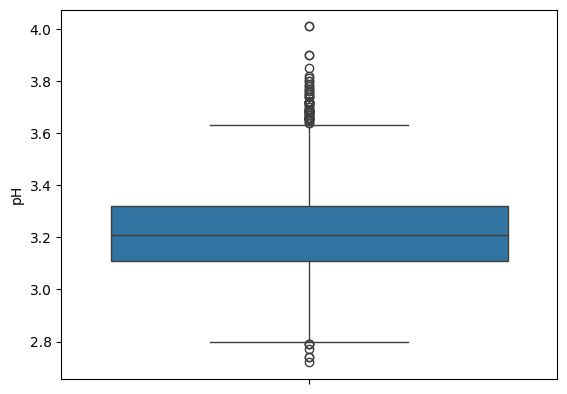

In [57]:
sns.boxplot(data=df_filtered, y="pH")